#Import libraries and Preprocessed dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/Aqar_Riyadh_Processed.xlsx')

In [2]:
df.info()

##data have 9 features, non-null datatype""object and int"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property_ID    1200 non-null   object
 1   Property Type  1200 non-null   object
 2   Bedrooms       1200 non-null   int64 
 3   Bathrooms      1200 non-null   int64 
 4   Area           1200 non-null   int64 
 5   Price          1200 non-null   int64 
 6   Location       1200 non-null   object
 7   District       1200 non-null   object
 8   Agency_Name    821 non-null    object
dtypes: int64(4), object(5)
memory usage: 84.5+ KB


# EDA


1-Missing values analysis

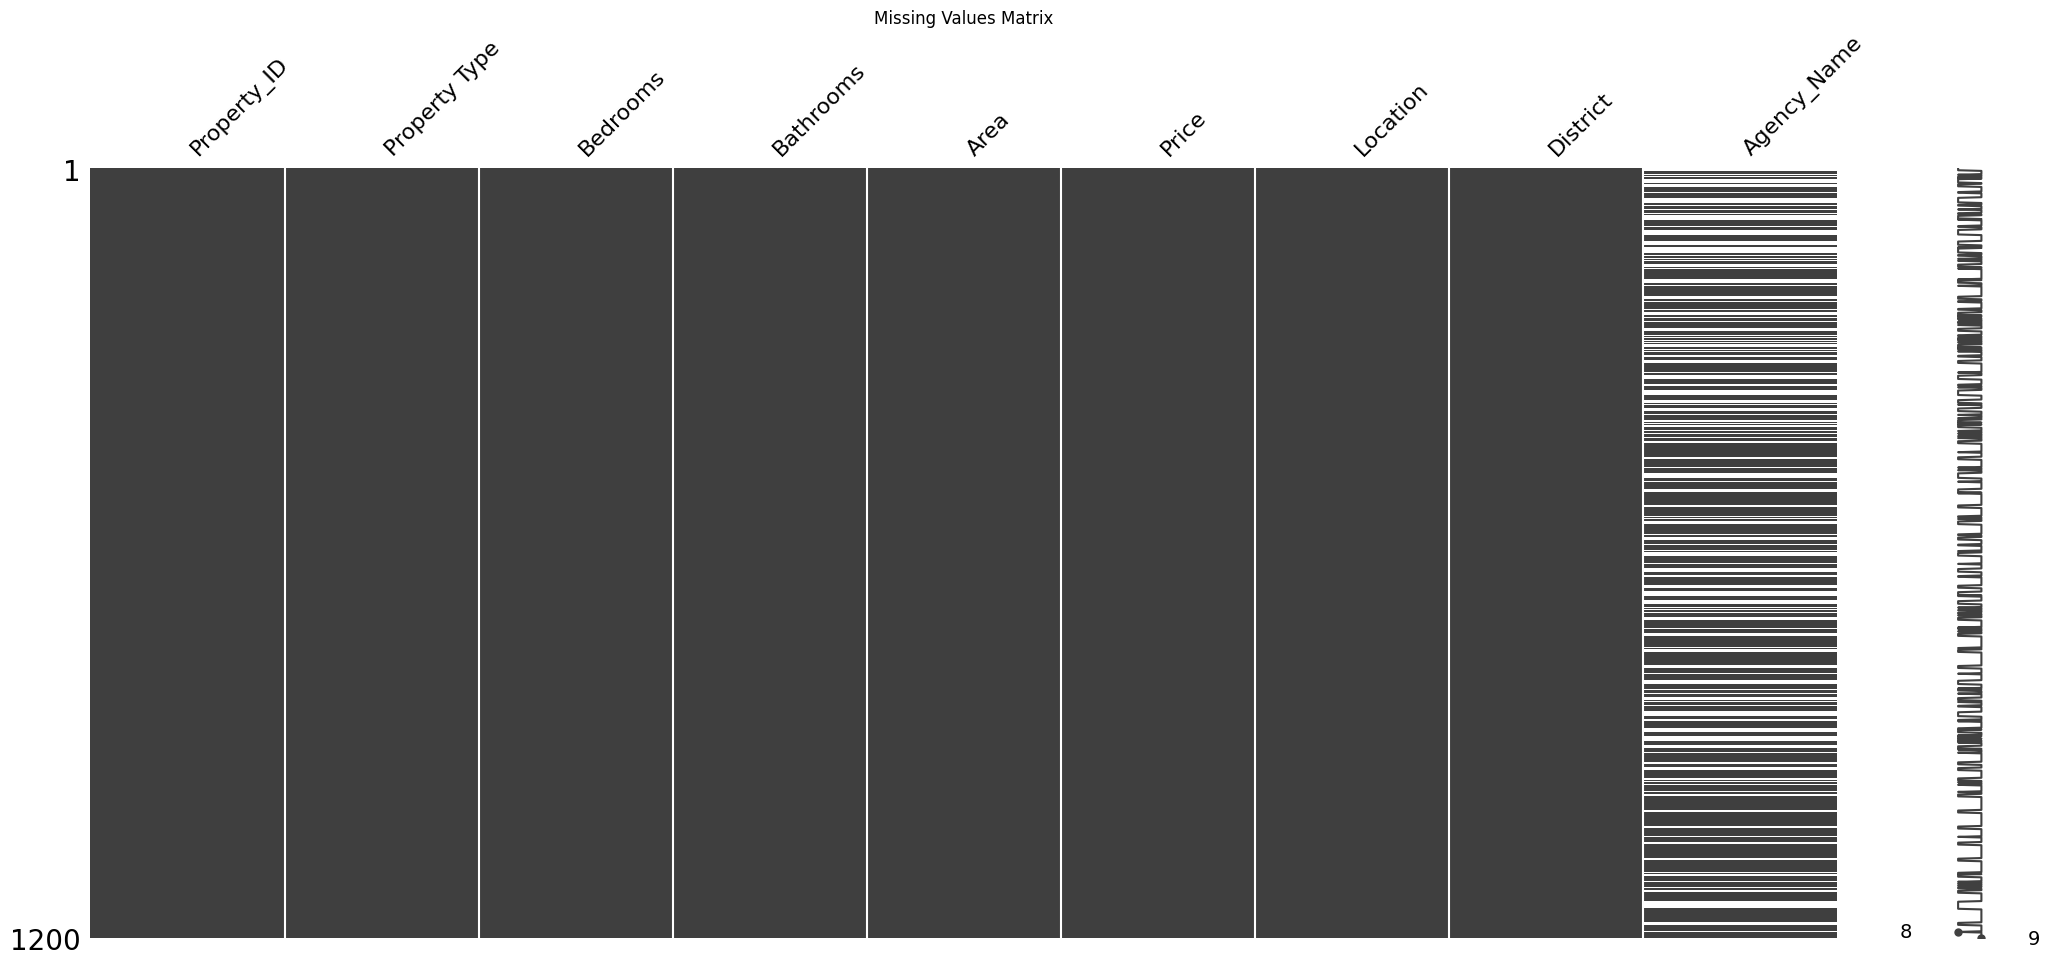

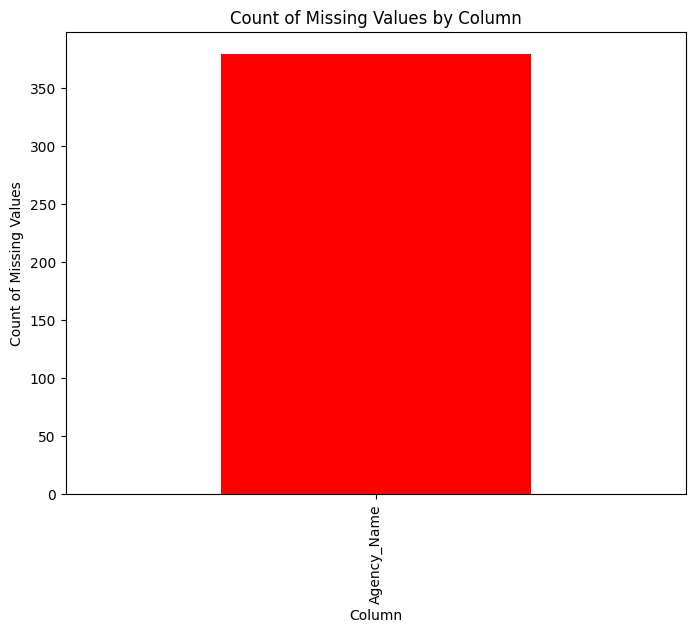

In [3]:
import missingno as msno
#First count the number of each columns have missing values :
missing_values = df.isnull().sum()
# Visualize missing values
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()
# Bar plot of missing values
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(8, 6))
missing_values.plot(kind='bar', color='red')
plt.title('Count of Missing Values by Column')
plt.xlabel('Column')
plt.ylabel('Count of Missing Values')
plt.show()

# Th Agency most column

2-Outlier detect and visualization

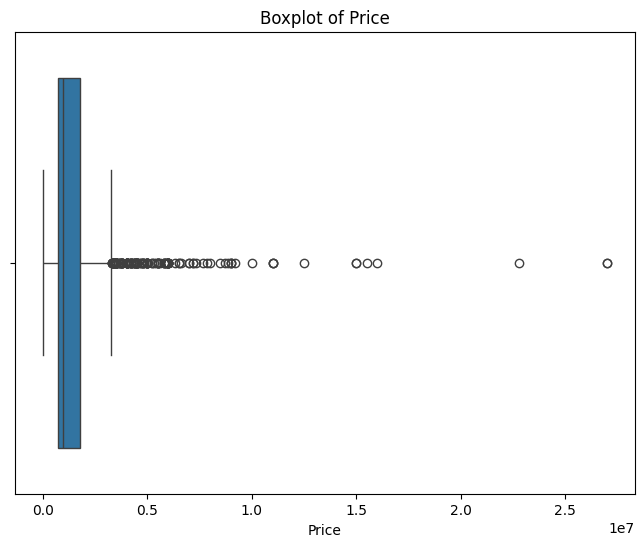

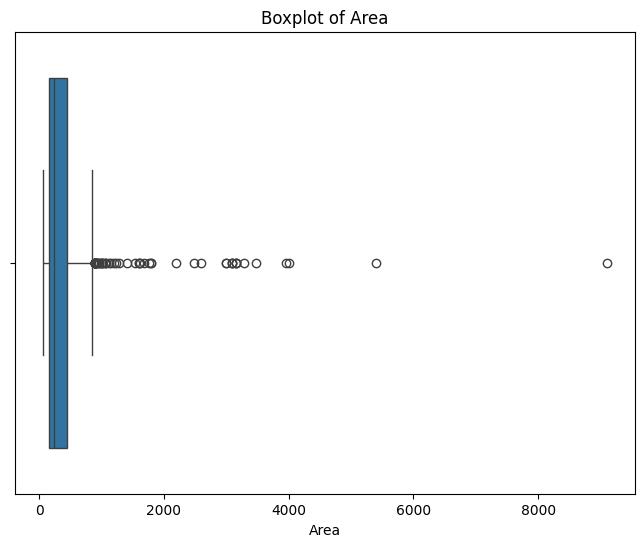

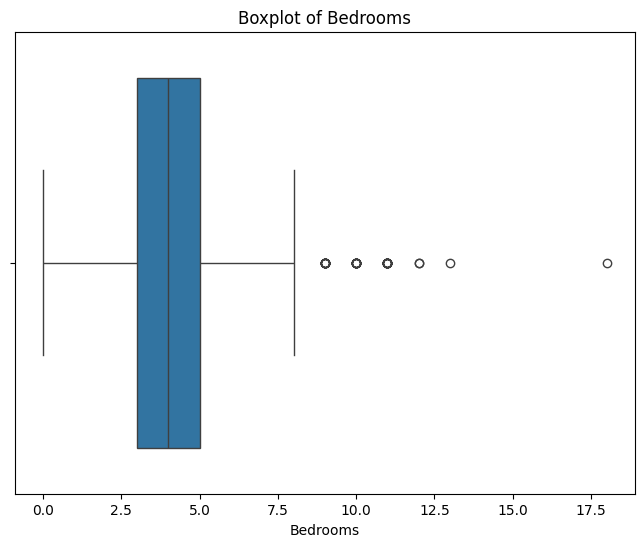

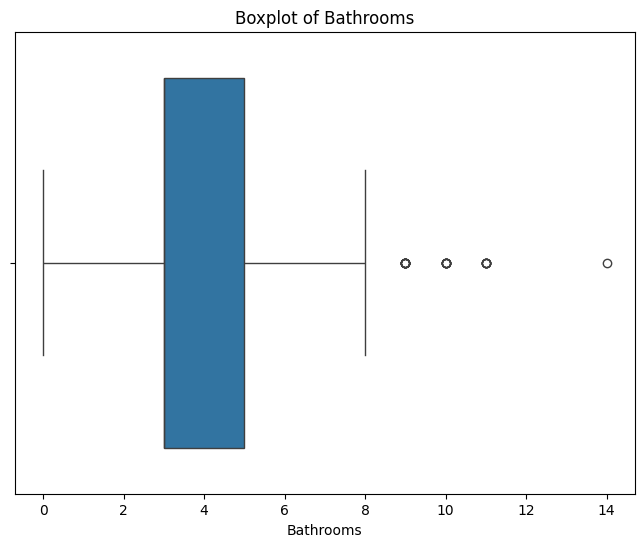

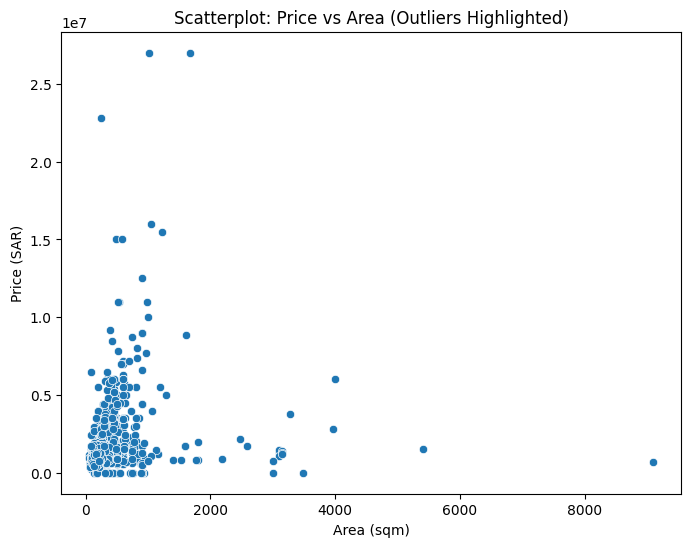

In [4]:
#visualize outliers by using boxplot for columns have numeric values
numerical_features = ['Price', 'Area', 'Bedrooms', 'Bathrooms']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()
#scatterplot for "price vs area" outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Area'], y=df['Price'])
plt.title('Scatterplot: Price vs Area (Outliers Highlighted)')
plt.xlabel('Area (sqm)')
plt.ylabel('Price (SAR)')
plt.show()


3-Categorical Analysis

<ipython-input-5-3edf641f8061>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Property Type', data=df, palette='Set3', order=df['Property Type'].value_counts().index)


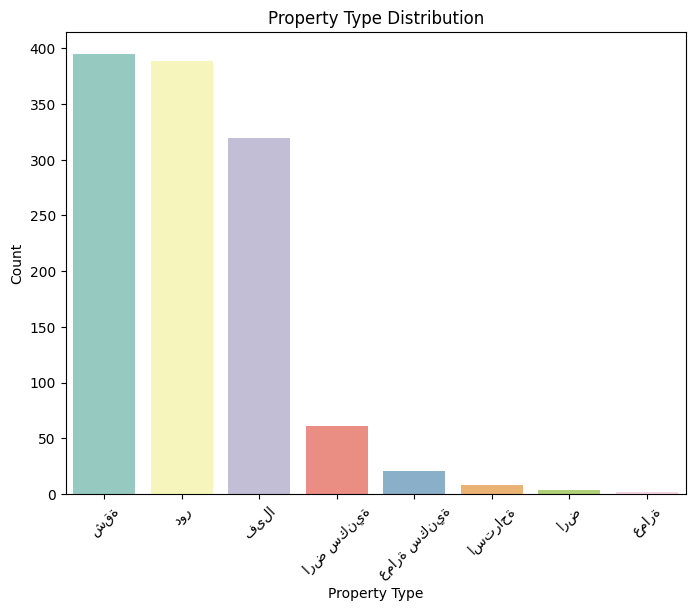

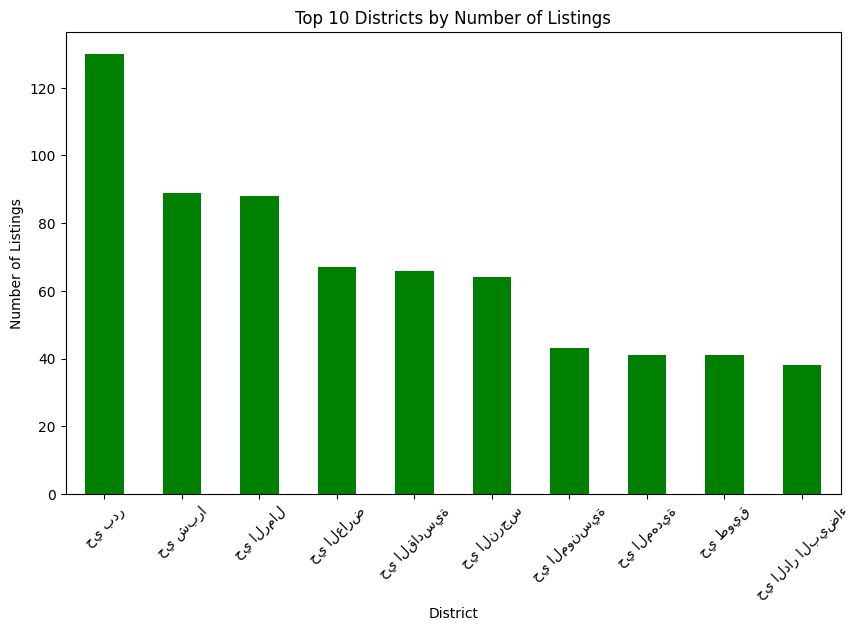

In [5]:
#expl the distribution of categorical features "property type and dstrict"
#Property column
plt.figure(figsize=(8, 6))
sns.countplot(x='Property Type', data=df, palette='Set3', order=df['Property Type'].value_counts().index)
plt.title('Property Type Distribution')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#District column
plt.figure(figsize=(10, 6))
df['District'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Districts by Number of Listings')
plt.xlabel('District')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

4-statistics for numerical columns grouped by a categorical variable.

               count          mean           std       min        25%  \
Property Type                                                           
ارض              4.0  1.162800e+06  1.360883e+06    2200.0     8050.0   
ارض سكنية       61.0  1.626858e+06  2.294122e+06     535.0     6000.0   
استراحة          8.0  2.780000e+06  2.054799e+06  650000.0  1087500.0   
دور            389.0  9.869239e+05  3.452842e+05    1400.0   760000.0   
شقة            395.0  8.191368e+05  4.737396e+05     400.0   530000.0   
عمارة            2.0  2.150000e+06  2.192031e+06  600000.0  1375000.0   
عمارة سكنية     21.0  3.248476e+06  3.359450e+06  520000.0   800000.0   
فیلا           320.0  3.428683e+06  3.155240e+06  230000.0  1750000.0   

                     50%        75%         max  
Property Type                                    
ارض            1005000.0  2159750.0   2639000.0  
ارض سكنية       800000.0  1900000.0   9200000.0  
استراحة        2320000.0  4500000.0   6000000.0  
دور             860

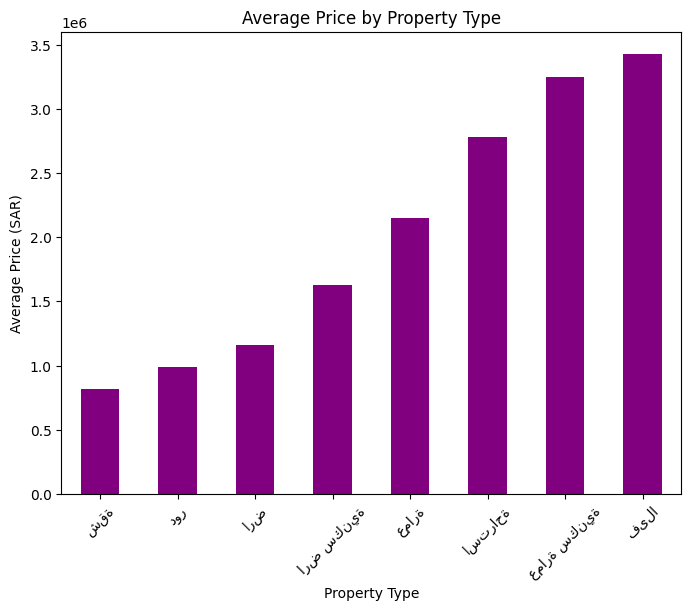

In [6]:
# Group statistics: Average Price by Property Type
property_type_stats = df.groupby('Property Type')['Price'].describe()
print(property_type_stats)

# Visualize Average Price by Property Type
avg_price_by_type = df.groupby('Property Type')['Price'].mean()
plt.figure(figsize=(8, 6))
avg_price_by_type.sort_values().plot(kind='bar', color='purple')
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price (SAR)')
plt.xticks(rotation=45)
plt.show()

5-correlation analysis

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

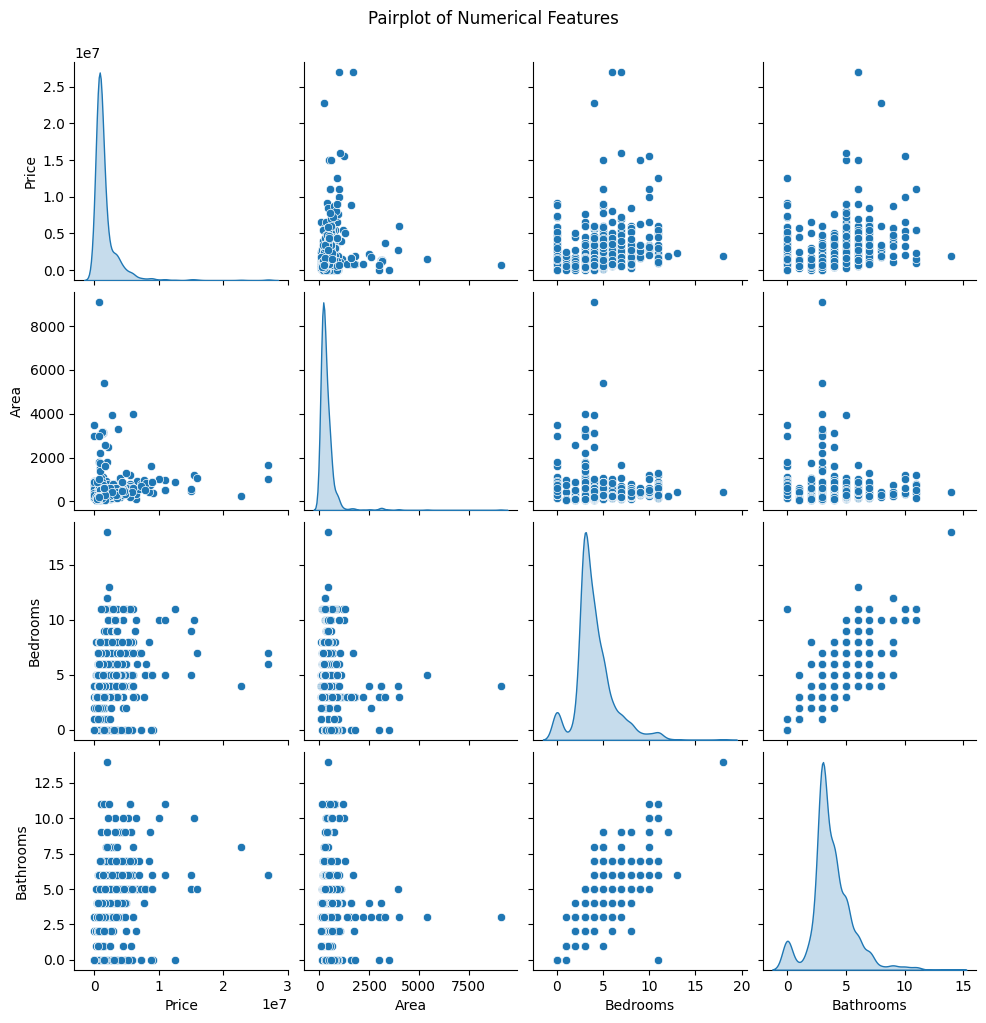

In [7]:
# Pairplot for relationships between numerical variables
sns.pairplot(df[['Price', 'Area', 'Bedrooms', 'Bathrooms']], diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

6-Geo analysis

. الأحياء الأكثر توفراً للعقارات

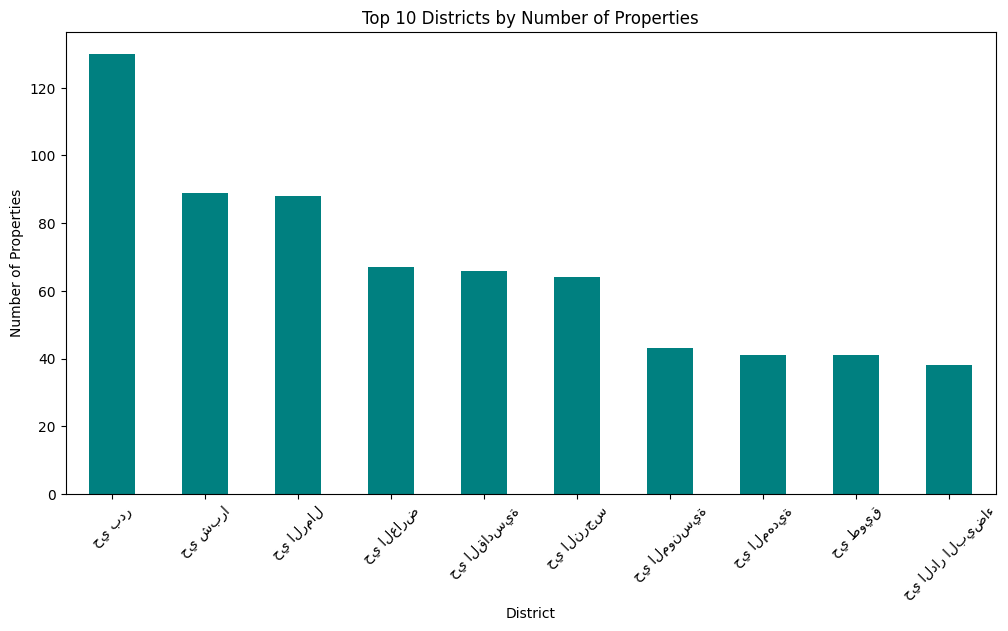

In [8]:
# Count of properties by district
district_count = df['District'].value_counts()

# Visualization: Top districts by number of properties
plt.figure(figsize=(12, 6))
district_count.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Districts by Number of Properties')
plt.xlabel('District')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()

. مقارنة توزيع العقارات بين شمال، جنوب، شرق، وغرب الرياض

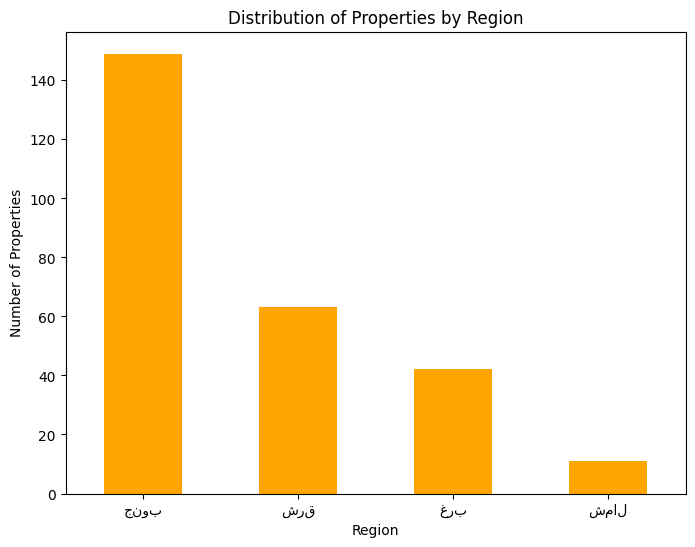

In [9]:
# Define a mapping for districts to regions
region_mapping = {
    'حي الملك فهد': 'شمال', 'حي الوادي': 'شمال', 'حي الصحافة': 'شمال',
    'حي بدر': 'جنوب', 'حي السويدي': 'جنوب',
    'حي المونسية': 'شرق', 'حي قرطبة': 'شرق',
    'حي طويق': 'غرب', 'حي العريجاء': 'غرب'
}

# Add a region column based on district mapping
df['Region'] = df['District'].map(region_mapping)

# Count properties by region
region_count = df['Region'].value_counts()

# Visualization: Properties by region
plt.figure(figsize=(8, 6))
region_count.plot(kind='bar', color='orange')
plt.title('Distribution of Properties by Region')
plt.xlabel('Region')
plt.ylabel('Number of Properties')
plt.xticks(rotation=0)
plt.show()

**وكالات العقارات: تحليل نشاط وأسعار الوكالات**
. الوكالات الأكثر نشاطاً في بيع العقارات

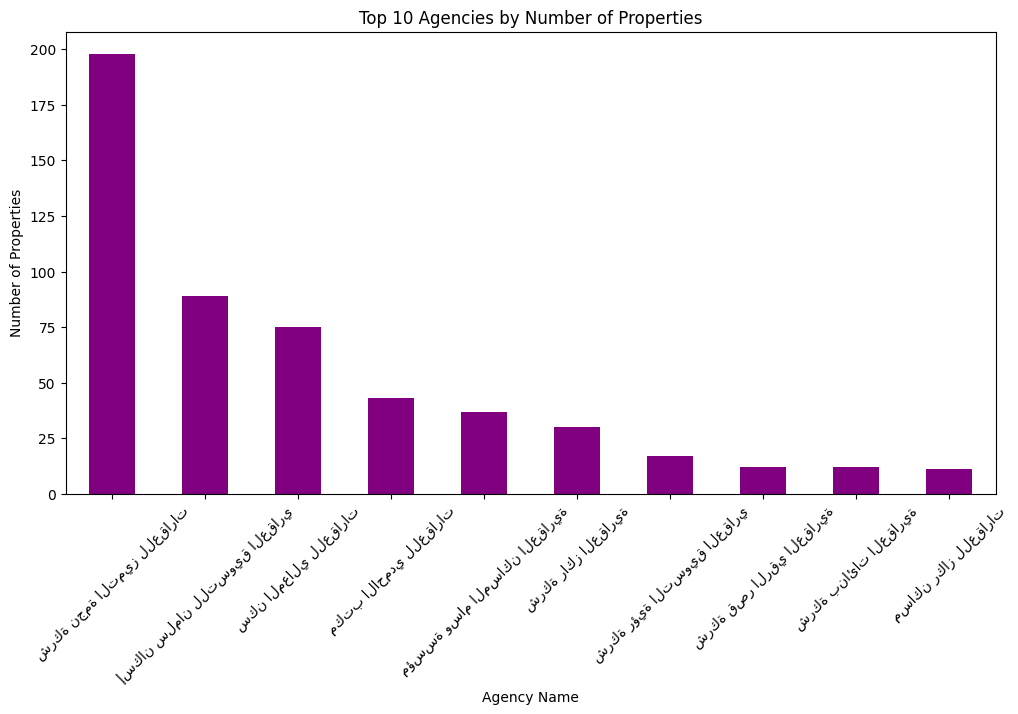

In [10]:
# Count of properties listed by agency
agency_count = df['Agency_Name'].value_counts()

# Visualization: Top agencies by number of properties
plt.figure(figsize=(12, 6))
agency_count.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Agencies by Number of Properties')
plt.xlabel('Agency Name')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()

. الوكالات التي تعرض أعلى أسعار للعقارات

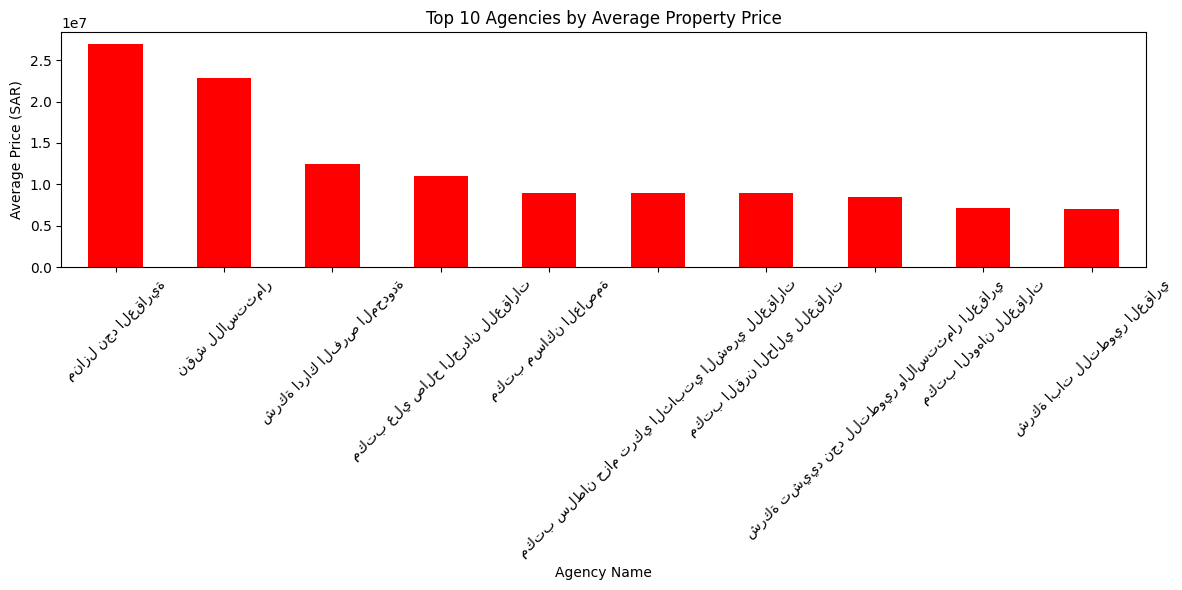

In [11]:
import matplotlib as mpl
# Average property price by agency
agency_avg_price = df.groupby('Agency_Name')['Price'].mean()
# Visualization: Top agencies by average price
plt.figure(figsize=(12, 6))
agency_avg_price.sort_values(ascending=False).head(10).plot(kind='bar', color='red')
plt.title('Top 10 Agencies by Average Property Price')
plt.xlabel('Agency Name')
plt.ylabel('Average Price (SAR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ترتيب الكلام العربي افضل

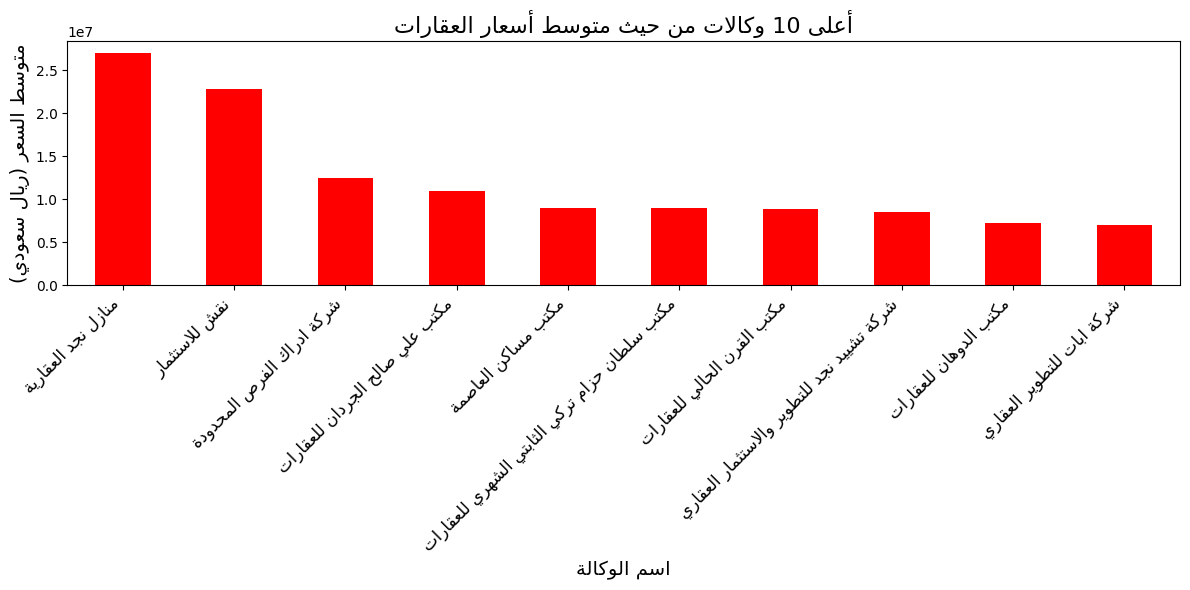

In [13]:
!pip install python-bidi
!pip install arabic_reshaper
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Average property price by agency
agency_avg_price = df.groupby('Agency_Name')['Price'].mean()

# Reshape and reverse the Arabic text for correct rendering
agency_avg_price = agency_avg_price.sort_values(ascending=False).head(10)
agency_avg_price.index = [get_display(arabic_reshaper.reshape(name)) for name in agency_avg_price.index]

# Visualization: Top agencies by average price
plt.figure(figsize=(12, 6))
agency_avg_price.plot(kind='bar', color='red')
plt.title(get_display(arabic_reshaper.reshape('أعلى 10 وكالات من حيث متوسط أسعار العقارات')), fontsize=16)
plt.xlabel(get_display(arabic_reshaper.reshape('اسم الوكالة')), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape('متوسط السعر (ريال سعودي)')), fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')  # Align text for better readability
plt.tight_layout()  # Ensure proper layout
plt.show()